In [1833]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and understanding the data

In [1834]:
# Import the carPrice csv file
car = pd.read_csv(r'C:\Users\Admin\Downloads\Jupiter Notebook Python\Linear Regression Assignment\CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1835]:
# check number of rows and columns in the carPrice dataset
car.shape

(205, 26)

In [1836]:
# Check if there is any null value present in the dataset.
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1837]:
# As we have to consider only company name from the carName column, fetch the companyName of the car from the carName column.

def fetch_company_name(carname):   
    return carname.split(' ')[0]       # split from the space, as first word is the company name of the car.

car['companyname'] = car['CarName'].apply( lambda x: fetch_company_name(x))

In [1838]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1839]:
# Now, we need of the CarName column, so we have to drop it.
car = car.drop('CarName', axis = 1)

In [1840]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1841]:
car.shape

(205, 26)

In [1842]:
# Convert categorical variables into lower case to make the data consistent.

def convert_lower(item):
    return item.str.lower()

cat_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem', 'companyname']
car[cat_vars] = car[cat_vars].apply(lambda x: convert_lower(x))

In [1843]:
# As we can see there are some typing errors in company name column, which makes our data inconsistent. Let fix it first.
car['companyname'].loc[:'companyname']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

In [1844]:
# Replace typing errors with correct ones.
car['companyname'] = car['companyname'].replace('maxda', 'mazda')
car['companyname'] = car['companyname'].replace('porcshce','porsche')
car['companyname'] = car['companyname'].replace('toyouta', 'toyota')
car['companyname'] = car['companyname'].replace('vokswagen','volkswagen')
car['companyname'] = car['companyname'].replace('vw','volkswagen')

In [1845]:
car['companyname']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           mazda
51           mazda
52          

In [1846]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1847]:
# As we know symboling column is categorical variable, so convert it into object type.
car['symboling'] = car['symboling'].astype('object')

In [1848]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [1849]:
# As we can see doornumber and cylindernumber have some same type of variable names, to prevent it from ambiguity
# We can convert two of doornumber to two_door and four of doornumber to four_door.
car['doornumber'] = car['doornumber'].map({'two': 'two_door', 'four': 'four_door'})
car['doornumber']

0       two_door
1       two_door
2       two_door
3      four_door
4      four_door
5       two_door
6      four_door
7      four_door
8      four_door
9       two_door
10      two_door
11     four_door
12      two_door
13     four_door
14     four_door
15     four_door
16      two_door
17     four_door
18      two_door
19      two_door
20     four_door
21      two_door
22      two_door
23      two_door
24     four_door
25     four_door
26     four_door
27      two_door
28     four_door
29      two_door
30      two_door
31      two_door
32      two_door
33      two_door
34      two_door
35     four_door
36     four_door
37      two_door
38      two_door
39     four_door
40     four_door
41     four_door
42      two_door
43     four_door
44      two_door
45     four_door
46      two_door
47     four_door
48     four_door
49      two_door
50      two_door
51      two_door
52      two_door
53     four_door
54     four_door
55      two_door
56      two_door
57      two_door
58      two_do

In [1850]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two_door,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two_door,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two_door,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four_door,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four_door,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1851]:
car.shape

(205, 26)

In [1852]:
# Function for count plot.
def count_plot(item, df, rot = 0, title = ''):
    sns.set(style="whitegrid")
    plt.figure(figsize=(13,8))
    plt.xticks(rotation=rot)
    sns.countplot(x=item, data=df, palette='winter')
    plt.title(title)

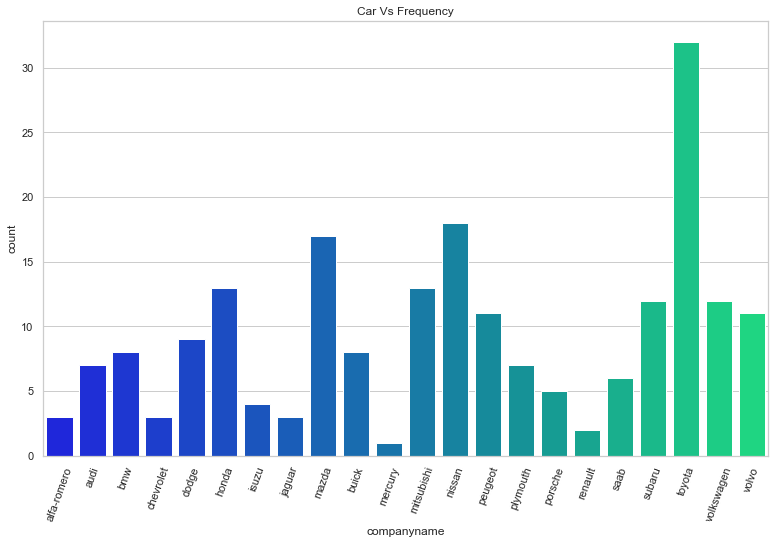

In [1853]:
# Let see which car is most preferred by the user.
count_plot('companyname', car, 70,'Car Vs Frequency')
# We can see that Toyata car brand is most preferred by the customers.

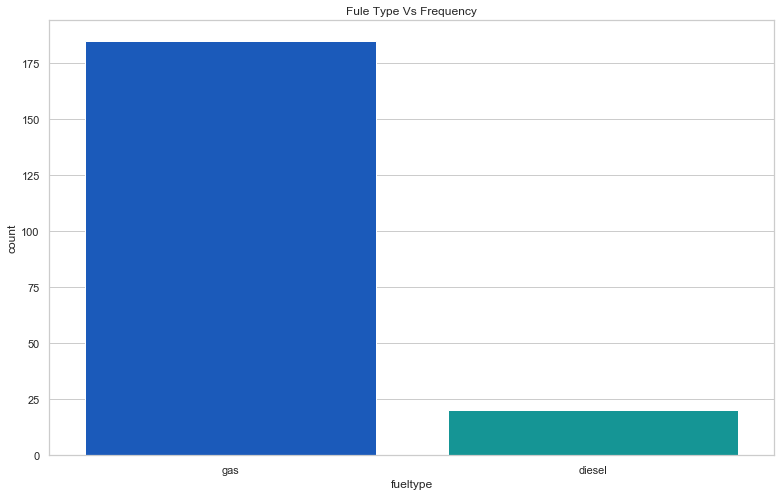

In [1854]:
# Let see which car is most preferred by the user.
count_plot('fueltype', car, 0,'Fule Type Vs Frequency')
# We can see that Gas fuel type is most preferred by the customers.

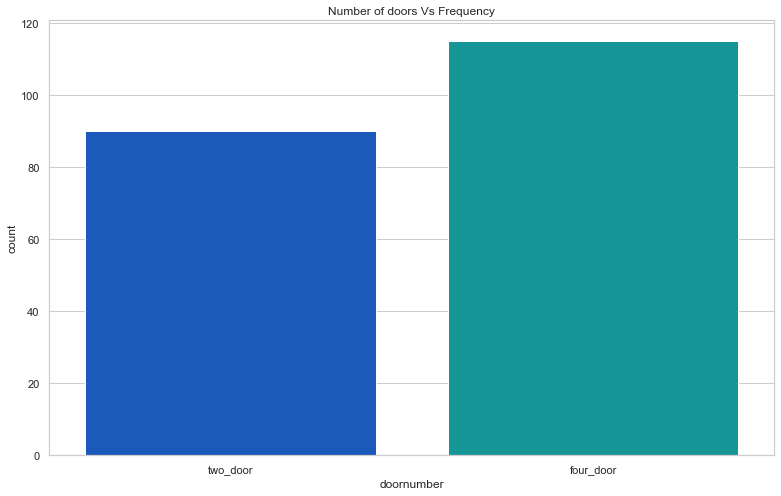

In [1855]:
# Let see which car is most preferred by the user.
count_plot('doornumber', car, 0,'Number of doors Vs Frequency')
# We can see that car with four doors is most preferred by the customers.

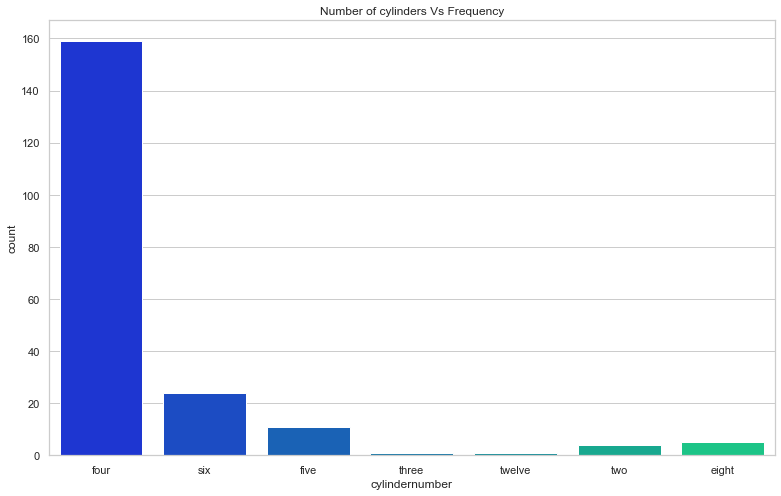

In [1856]:
# Let see which car is most preferred by the user.
count_plot('cylindernumber', car, 0,'Number of cylinders Vs Frequency')
# We can see that Toyata car with four cylinders is most preferred by the customers.

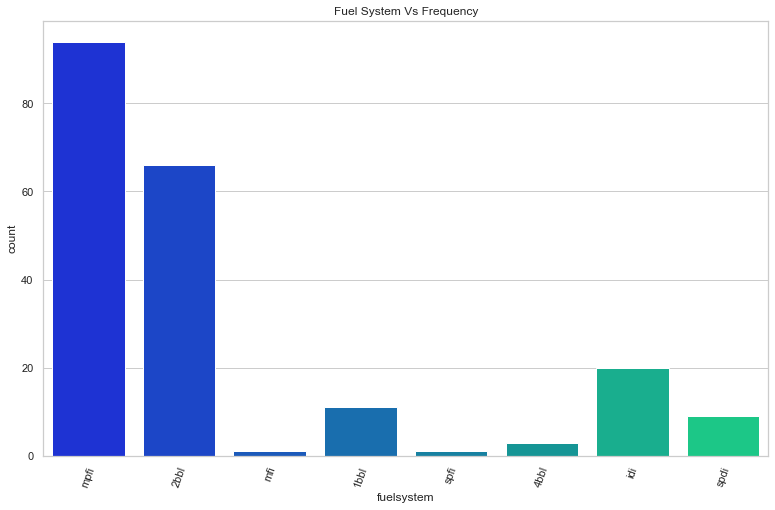

In [1857]:
# Let see which car is most preferred by the user.
count_plot('fuelsystem', car, 70,'Fuel System Vs Frequency')
# We can see that mpfi fuelsystem is most preferred by the customers.

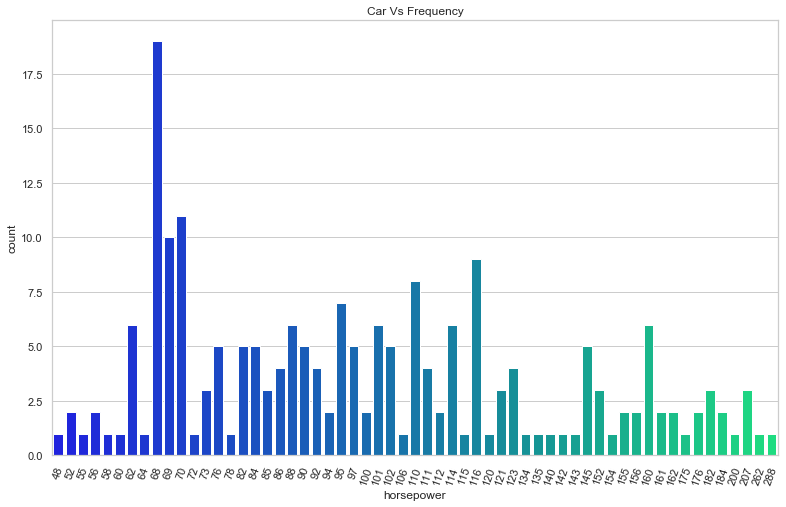

In [1858]:
# Let see which car is most preferred by the user.
count_plot('horsepower', car, 70,'Car Vs Frequency')
# We can see that car with 68 Horse Power is most preferred by the customers.

### Step 2: Visualising the data

In [1859]:
# Box Sub plots for categorical variables
def box_plot(xitem, yitem, df,  plotnumber, row, col, rot = 0, title = ''):
    plt.subplot(row,col,plotnumber)
    sns.boxplot(x = xitem, y = yitem, data = df)
    plt.title(title)
    plt.xticks(rotation=rot)

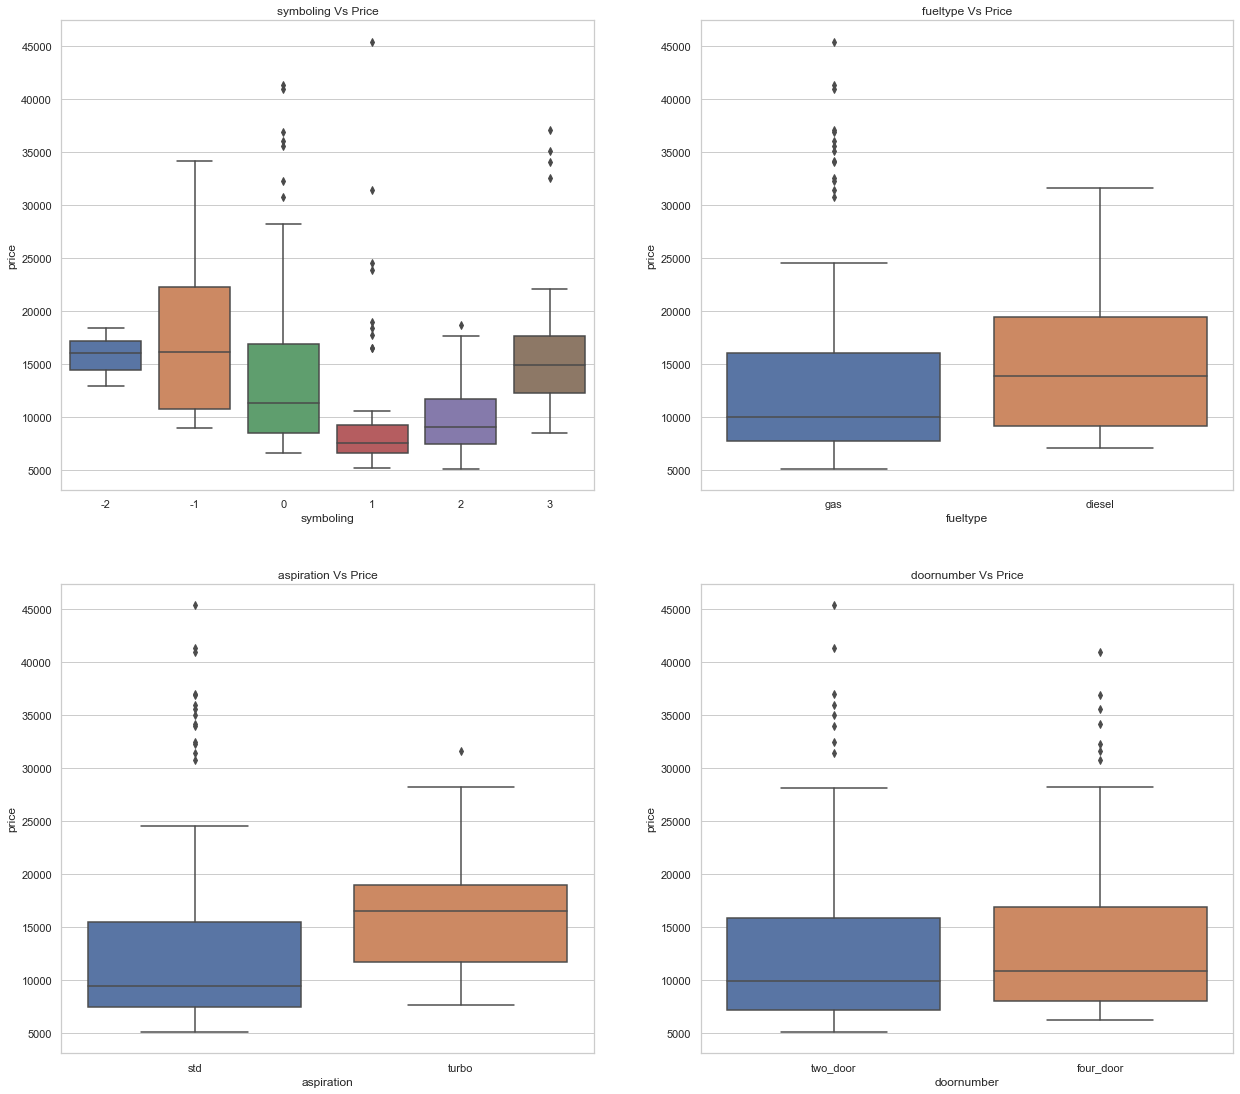

In [1860]:
# First plot between first 4 categorical variables for better understanding, so that we can clearly see the patterns.
new_cat_vars = ['symboling','fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem', 'companyname']
plt.figure(figsize=(21, 19))
for i in range(0, 4):
    box_plot(new_cat_vars[i], 'price', car, i+1, 2, 2, 0 , new_cat_vars[i] + ' Vs Price')

- We can see that Turbo aspiration has higher price then the std.
- Car with fueltype Diesel has higher price then the car with fueltype Gas
- There is no such difference between Two and Four doornumber car

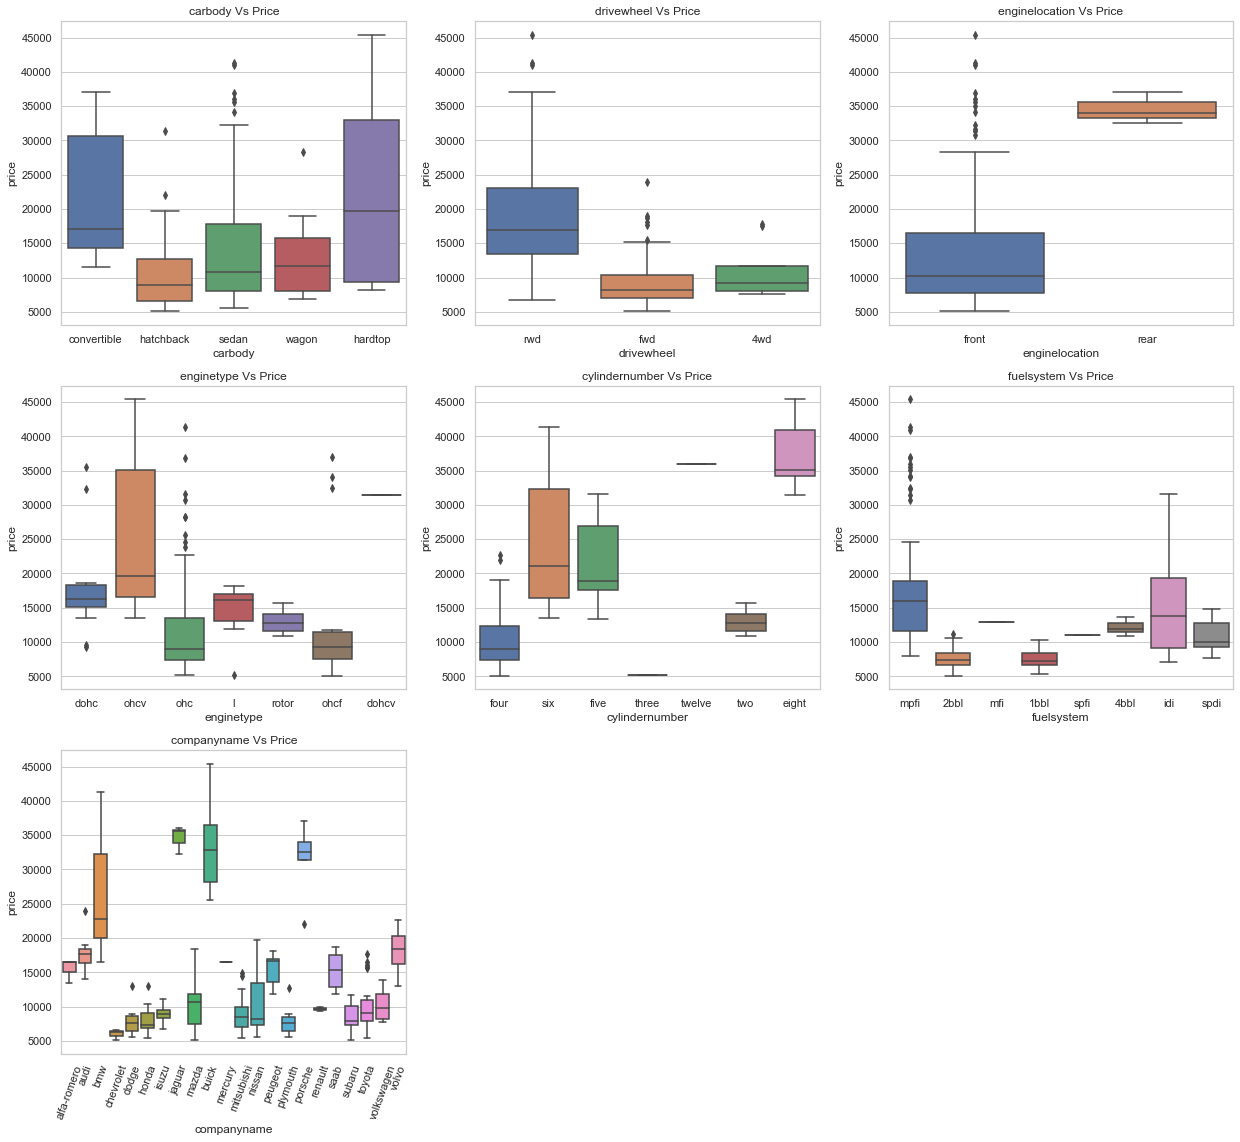

In [1861]:
# plot the box plots for the remaining categorical variables
plt.figure(figsize=(21, 19))
j = 0
for i in range(4, 11):
    box_plot(new_cat_vars[i], 'price', car, j+1, 3, 3, 70 if i == 10 else 0 , new_cat_vars[i] + ' Vs Price')
    j = j + 1

In [1862]:
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two_door,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two_door,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two_door,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four_door,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four_door,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1863]:
# Now plot the scatter plot for numeric variables
def scatter_plot(xitem, yitem, df, row, col, plotnumber, title = ''):
    plt.subplot(row,col,plotnumber)
    ax = sns.scatterplot(x=xitem, y=yitem, data=df)
    plt.title(title)

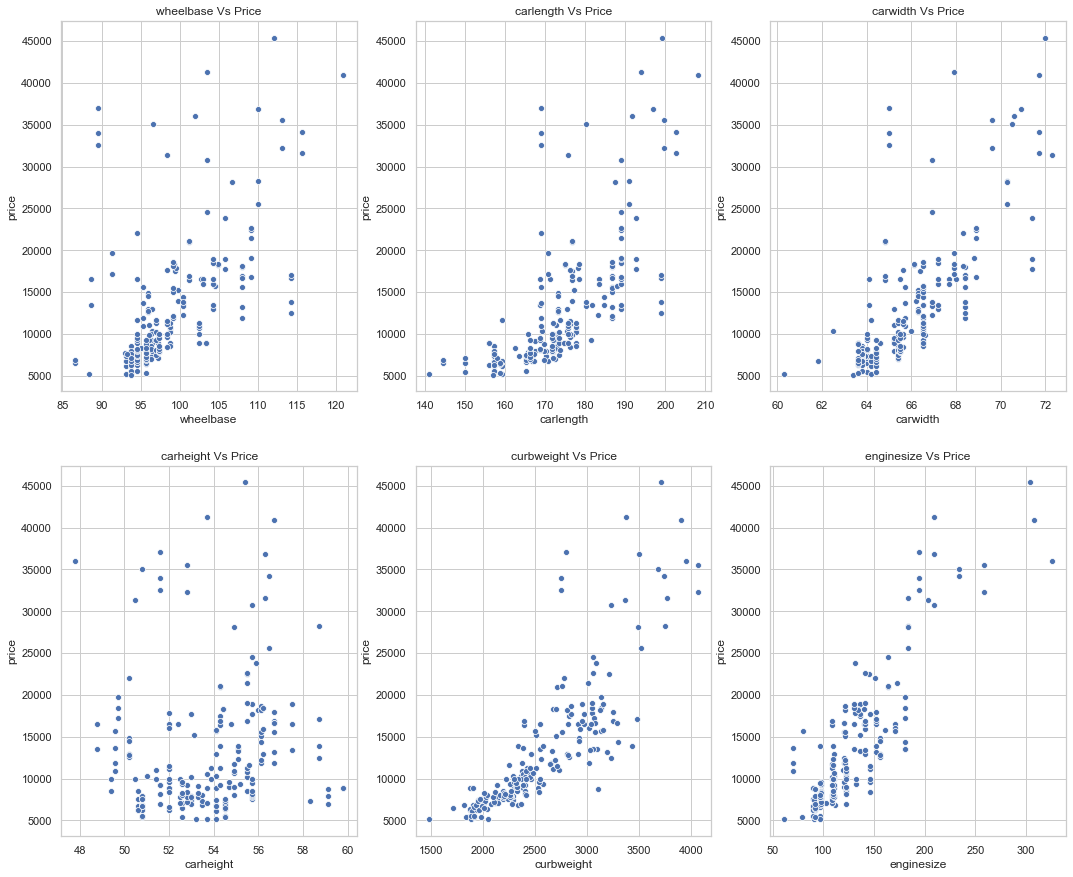

In [1864]:
# Scatter subplots of half of the numeric variables for the ease of understanding
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg']
plt.figure(figsize=(18, 15))
for i in range(0, len(num_vars)//2):
    scatter_plot(num_vars[i], 'price', car, 2,3, i+1, num_vars[i]+' Vs Price')

- As we can see wheelbase, carlength, carwidth has a positive correlation with price
- Also Curbweight, enginesize has a positive correlation with price
- From this visualization, it is clear that it is significant to built the linear model.

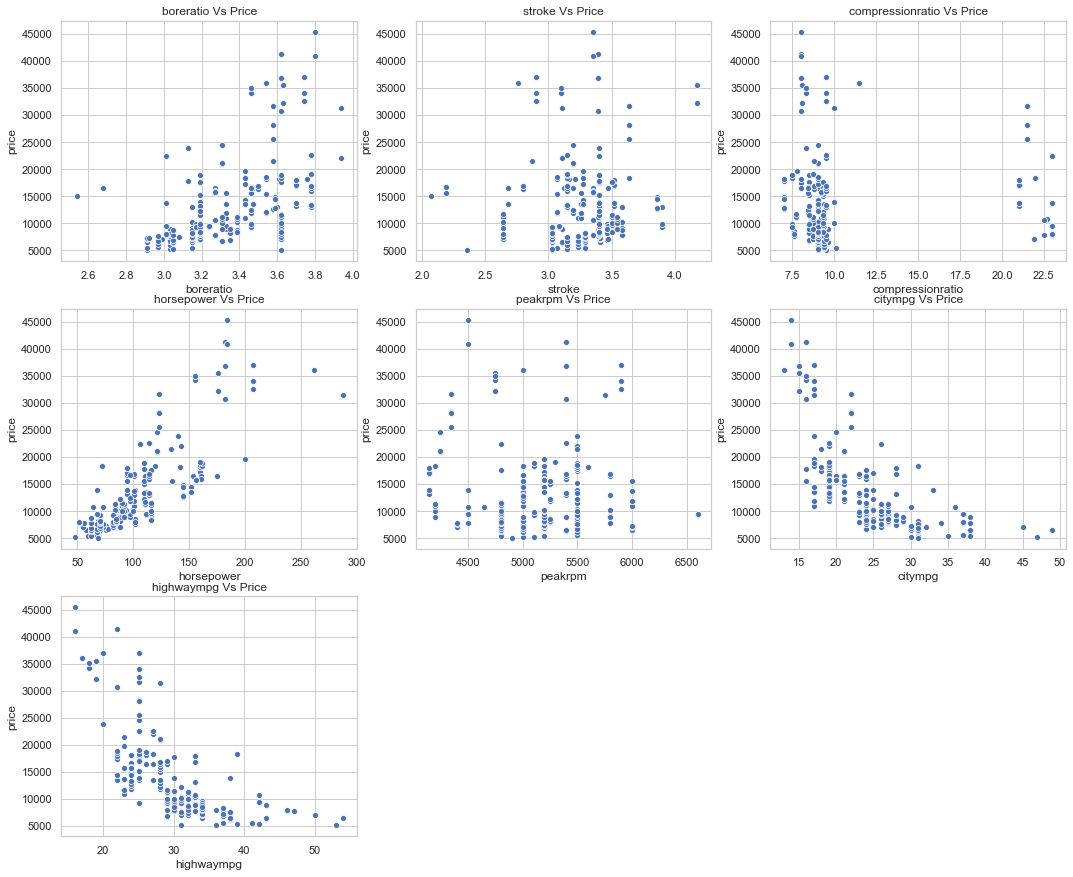

In [1865]:
# Now, built the linear model for the remaining numeric variables
j = 0
plt.figure(figsize=(18, 15))
for i in range(len(num_vars)//2, len(num_vars)):
    scatter_plot(num_vars[i], 'price', car, 3,3, j+1, num_vars[i]+' Vs Price')
    j = j + 1

- As we can see horsepower, boreratio has the positive correlation with the price

### Step 3: Preparing the data for modelling
- Encoding
 - Converting binary vars to 0/1
 - other categorical vars to dummy vars
- Splitting into train and test
- Rescalling of variables

In [1866]:
# convert the categorival vars into the dummy variables
def dummy_var(xitem, df):
    dum_var = pd.get_dummies(df[xitem], drop_first = True)
    df = pd.concat([df,dum_var], axis = 1)
    return df

In [1867]:
for i in range(0, len(new_cat_vars)):
    car = dummy_var(new_cat_vars[i], car)

In [1868]:
car.shape

(205, 81)

#### Drop the Old categorical variables as we already create the dummy variables for it.

In [1869]:
car = car.drop(new_cat_vars, axis = 1)
car.shape

(205, 70)

In [1870]:
# As we dont need the car_ID variable so we can drop it.
car = car.drop('car_ID', axis = 1)
car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,gas,turbo,two_door,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1871]:
# Now we drop those numeric variables which are not required for the models.
not_req_num = ['carheight', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg']
car = car.drop(not_req_num, axis = 1)
car.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,-1,0,1,2,3,gas,turbo,two_door,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1872]:
car.shape

(205, 63)

In [1873]:
# We can rename the dummy variables of symbolic for the ease of understanding.
car.rename(columns={-1: 'symbolic_-1', 0: 'symbolic_0', 1: 'symbolic_1', 2: 'symbolic_2', 3: 'symbolic_3'}, inplace=True)
car.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,symbolic_-1,symbolic_0,symbolic_1,symbolic_2,symbolic_3,gas,turbo,two_door,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split the data into training and testing sets

In [1874]:
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [1875]:
# Create an object of the MinMaxScaler class.
scaler = MinMaxScaler()

In [1876]:
# Apply scaler() to all the columns except the 'dummy' variables.
scal_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']
df_train[scal_vars] = scaler.fit_transform(df_train[scal_vars])
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,symbolic_-1,symbolic_0,symbolic_1,symbolic_2,symbolic_3,gas,turbo,two_door,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1877]:
df_train.shape

(143, 63)

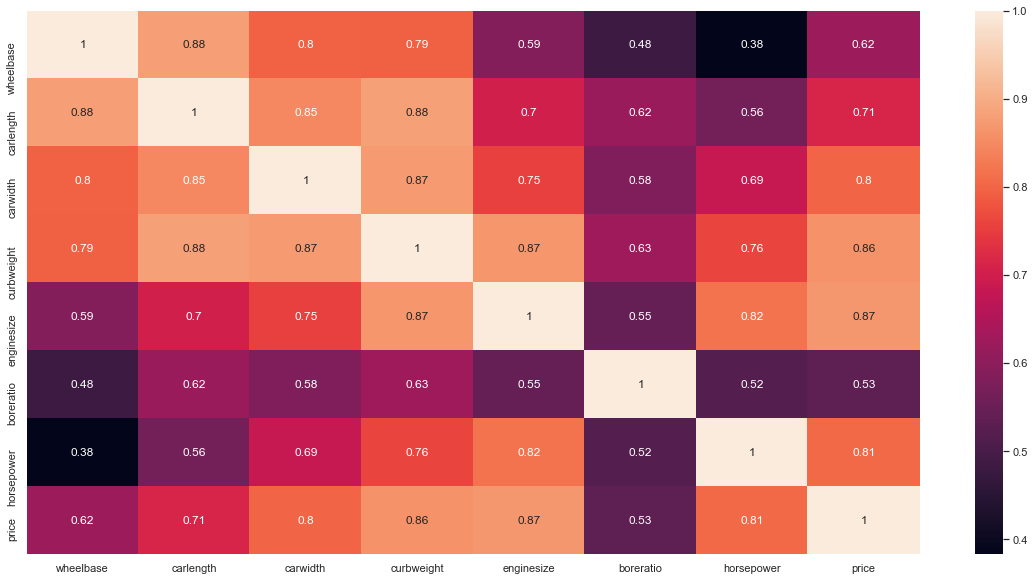

In [1878]:
# Let's check the correlation coefficients between numeric variables to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train[scal_vars].corr(), annot = True)
plt.show()

### Dividing into X and y sets for model building

In [1879]:
y_train = df_train.pop('price')
X_train = df_train

### Building our model using RFE ( Recursive Feature Elimination )

In [1880]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1881]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 13),
 ('horsepower', False, 3),
 ('symbolic_-1', False, 10),
 ('symbolic_0', False, 8),
 ('symbolic_1', False, 6),
 ('symbolic_2', False, 7),
 ('symbolic_3', False, 9),
 ('gas', False, 42),
 ('turbo', False, 40),
 ('two_door', False, 44),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 43),
 ('rwd', False, 28),
 ('rear', True, 1),
 ('dohcv', False, 23),
 ('l', False, 17),
 ('ohc', False, 34),
 ('ohcf', False, 18),
 ('ohcv', False, 24),
 ('rotor', False, 12),
 ('five', False, 15),
 ('four', False, 14),
 ('six', False, 35),
 ('three', True, 1),
 ('twelve', False, 16),
 ('two', True, 1),
 ('2bbl', False, 46),
 ('4bbl', False, 30),
 ('idi', False, 45),
 ('mfi', False, 47),
 ('mpfi', False, 29),
 ('spdi', False, 39),
 ('spfi', False, 48),
 ('audi', False, 22),
 ('bmw', True, 1),
 ('buick'

In [1882]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'rear', 'three', 'two', 'bmw',
       'peugeot'],
      dtype='object')

In [1883]:
X_train.columns[~rfe.support_]

Index(['boreratio', 'horsepower', 'symbolic_-1', 'symbolic_0', 'symbolic_1',
       'symbolic_2', 'symbolic_3', 'gas', 'turbo', 'two_door', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'twelve', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [1884]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [1885]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1886]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1887]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.11e-67
Time:                        22:24:34   Log-Likelihood:                 209.60
No. Observations:                 143   AIC:                            -389.2
Df Residuals:                     128   BIC:                            -344.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0469      0.035     -1.336      0.1

In [1888]:
# Check VIF 
def check_vif(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1889]:
vif = check_vif(X_train_rfe)
vif

,Features,VIF
0,const,50.41
4,curbweight,15.99
8,sedan,12.41
7,hatchback,10.46
2,carlength,9.86
5,enginesize,7.89
1,wheelbase,7.03
9,wagon,6.35
3,carwidth,6.23
6,hardtop,2.41


In [1890]:
# As we can see curbweight has high VIF, so we can drop it.
X = X_train_rfe.drop(['curbweight'], axis=1)

### Model 2

In [1891]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.11e-63
Time:                        22:24:52   Log-Likelihood:                 194.48
No. Observations:                 143   AIC:                            -361.0
Df Residuals:                     129   BIC:                            -319.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0374      0.039     -0.964      0.3

In [1892]:
# check VIF
vif = check_vif(X)
vif

,Features,VIF
0,const,50.29
7,sedan,11.66
6,hatchback,10.12
2,carlength,8.37
1,wheelbase,6.83
8,wagon,6.32
3,carwidth,5.94
4,enginesize,3.61
5,hardtop,2.35
9,rear,1.63


In [1893]:
# As we can see sedan has highest VIF, so we can drop it.
X = X.drop(['sedan'], axis=1)

### Model 3

In [1894]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.93e-60
Time:                        22:25:04   Log-Likelihood:                 185.60
No. Observations:                 143   AIC:                            -345.2
Df Residuals:                     130   BIC:                            -306.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1710      0.023     -7.546      0.0

In [1895]:
# check VIF
vif = check_vif(X)
vif

,Features,VIF
0,const,15.29
2,carlength,8.37
1,wheelbase,6.06
3,carwidth,5.90
4,enginesize,3.45
8,rear,1.61
6,hatchback,1.59
5,hardtop,1.53
12,peugeot,1.48
10,two,1.24


In [1896]:
# As we can see wagon has high p-value which makes it insignificant, so we can drop it.
X = X.drop(['wagon'], axis=1)

### Model 4

In [1897]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.82e-61
Time:                        22:25:24   Log-Likelihood:                 185.56
No. Observations:                 143   AIC:                            -347.1
Df Residuals:                     131   BIC:                            -311.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1705      0.023     -7.576      0.0

In [1898]:
# check VIF
vif = check_vif(X)
vif

,Features,VIF
0,const,15.19
2,carlength,7.96
1,wheelbase,6.06
3,carwidth,5.74
4,enginesize,3.40
7,rear,1.61
6,hatchback,1.56
5,hardtop,1.52
11,peugeot,1.48
9,two,1.24


In [1899]:
# As we can see hardtop has highest p-value which makes it insignificant, so we can drop it.
X = X.drop(['hardtop'], axis=1)

### Model 5

In [1900]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.91e-62
Time:                        22:25:37   Log-Likelihood:                 185.35
No. Observations:                 143   AIC:                            -348.7
Df Residuals:                     132   BIC:                            -316.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1726      0.022     -7.767      0.0

In [1901]:
# check VIF
vif = check_vif(X)
vif

,Features,VIF
0,const,14.87
2,carlength,7.94
1,wheelbase,6.06
3,carwidth,5.72
4,enginesize,3.38
5,hatchback,1.54
10,peugeot,1.48
8,two,1.24
9,bmw,1.16
6,rear,1.15


In [1902]:
# As we can see wheelbase has high p-value which makes it insignificant, so we can drop it.
X = X.drop(['wheelbase'], axis=1)

### Model 6

In [1903]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     139.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.54e-63
Time:                        22:25:50   Log-Likelihood:                 184.47
No. Observations:                 143   AIC:                            -348.9
Df Residuals:                     133   BIC:                            -319.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1768      0.022     -8.028      0.0

In [1904]:
# check VIF
vif = check_vif(X)
vif

,Features,VIF
0,const,14.54
1,carlength,5.46
2,carwidth,5.28
3,enginesize,3.34
4,hatchback,1.54
9,peugeot,1.26
7,two,1.21
8,bmw,1.14
5,rear,1.10
6,three,1.06


In [1905]:
# As we can see carlength has high p-value which makes it insignificant, so we can drop it.
X = X.drop(['carlength'], axis=1)       

### Model 7

In [1906]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.76e-64
Time:                        22:26:02   Log-Likelihood:                 183.34
No. Observations:                 143   AIC:                            -348.7
Df Residuals:                     134   BIC:                            -322.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1945      0.018    -10.573      0.0

In [1907]:
# check VIF
vif = check_vif(X)
vif

,Features,VIF
0,const,10.06
2,enginesize,3.20
1,carwidth,3.19
6,two,1.20
8,peugeot,1.18
3,hatchback,1.17
7,bmw,1.11
4,rear,1.09
5,three,1.06


In [1908]:
# As we can see hatchback has high p-value, it means this variable is insignificant, so we can drop it.
X = X.drop(['hatchback'], axis=1)       

### Model 8

In [1909]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.09e-64
Time:                        22:26:12   Log-Likelihood:                 181.94
No. Observations:                 143   AIC:                            -347.9
Df Residuals:                     135   BIC:                            -324.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2062      0.017    -12.092      0.0

In [1910]:
# check VIF
vif = check_vif(X)
vif

,Features,VIF
0,const,8.54
2,enginesize,3.20
1,carwidth,3.16
7,peugeot,1.16
5,two,1.14
3,rear,1.09
6,bmw,1.09
4,three,1.05


### Step 4: Residual analysis of the train data

In [1911]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

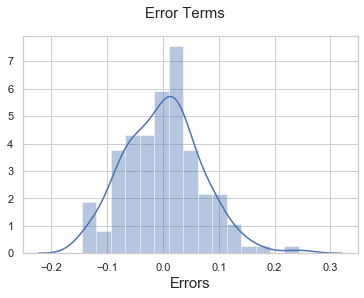

In [1912]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)                         # X-label

### As we from the plot it is clear that the error terms is normally distributed with mean equal to zero. 

### Step 5: Making predictions using the final model

In [1913]:
# Apply scaler() to all the columns except the 'dummy' variables.
scal_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower','price']
df_test[scal_vars] = scaler.transform(df_test[scal_vars])
df_test.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,symbolic_-1,symbolic_0,symbolic_1,symbolic_2,symbolic_3,gas,turbo,two_door,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,0.313793,0.409756,0.341667,0.235066,0.139623,0.404762,0.091667,0.072382,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,0.368966,0.497561,0.433333,0.305275,0.181132,0.404762,0.154167,0.093295,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,0.420690,0.596748,0.516667,0.347944,0.230189,0.563492,0.150000,0.102964,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,0.272414,0.448780,0.308333,0.301396,0.139623,0.444444,0.266667,0.115479,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,0.231034,0.263415,0.291667,0.291699,0.177358,0.746032,0.104167,0.068652,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Dividing into X_test and y_test

In [1914]:
y_test = df_test.pop('price')
X_test = df_test

In [1915]:
# Now let's use our model to make predictions.
X = X.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1916]:
# Making predictions using the eleventh model

y_pred_m = lm.predict(X_test_new)

### Calculating the R2 of test dataset

In [1917]:
r2_score(y_test, y_pred_m)

0.9009289435455468

In [1918]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.09e-64
Time:                        22:26:45   Log-Likelihood:                 181.94
No. Observations:                 143   AIC:                            -347.9
Df Residuals:                     135   BIC:                            -324.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2062      0.017    -12.092      0.000      -0.240      -0.172
carwidth       0.5301      0.056      9.399      0.000       0.419       0.642
enginesize     0.6833      0.068     10.093      0.000       0.549       0.817
rear           0.4543      0.073      6.220      0.000       0.310       0.599
three          0.2071      0.072      2.883      0.005       0.065       0.349
two            0.1563      0.038      4.136      0.000       0.082       0.231
bmw            0.2452      0.030      8.067      0.000       0.185       0.305
peugeot       -0.0611      0.027     -2.232      0.027      -0.115      -0.007
==============================================================================
Omnibus:                        4.084   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.558
Skew:                           0.332   Prob(JB):                        0.169
Kurtosis:                       3.396   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we can see R2 of both train set and test set almost equal, so we can say that model is good fit and also
### Prob( F-Statistics ) is almost equal to zero, so we can say that our model is significant 

Text(0, 0.5, 'y_pred')

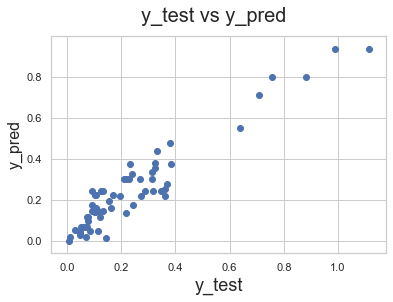

In [1919]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### We can see that equation of our best fit line is:
  price = 0.530 * carwidth + 0.683 * enginesize + 0.454 * rear + 0.207 * three + 0.156 * two + 0.245 * bmw - 0.061 * peugeot